##Chapter 3 Regression


In [ ]:
import tensorflow as tf

In [ ]:
#set number of observations and samples
S = 100
N = 10000

In [ ]:
#set true values of parameters
alpha = tf.constant([1.],tf.float32)
beta = tf.constant([3.],tf.float32)

In [ ]:
print(alpha)

tf.Tensor([1.], shape=(1,), dtype=float32)


In [ ]:
#draw indepentent var and error
X = tf.random.normal([N,S])
epsilon = tf.random.normal([N,S],stddev=0.25)

In [ ]:
#compute the dependent var
Y = alpha + beta*X + epsilon

In [ ]:
#draw initial values randomly
alphaHat0 = tf.random.normal([1],stddev=5.0)
betaHat0 = tf.random.normal([1],stddev=5.0)



In [ ]:
alphaHat0

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-4.67004], dtype=float32)>

In [ ]:
alphaHat = tf.Variable(alphaHat0,tf.float32)
betaHat = tf.Variable(betaHat0, tf.float32)

#define func to compute MAE Loss
def maeLoss(alphaHat,betaHat,xSample,ySample):
  prediction = alphaHat + betaHat*xSample
  error = ySample - prediction
  absError = tf.abs(error)
  return tf.reduce_mean(absError)

In [ ]:
# Define optimizer.
opt = tf.optimizers.SGD()

# Define empty lists to hold parameter values.
alphaHist, betaHist = [], []

# Perform minimization and retain parameter updates.
for j in range(1000):

# Perform minimization step.
	opt.minimize(lambda: maeLoss(alphaHat, betaHat,
	X[:,0], Y[:,0]), var_list = [alphaHat, 
betaHat])

# Update list of parameters.
	alphaHist.append(alphaHat.numpy()[0])
	betaHist.append(betaHat.numpy()[0])




Text(0, 0.5, 'Parameter Value')

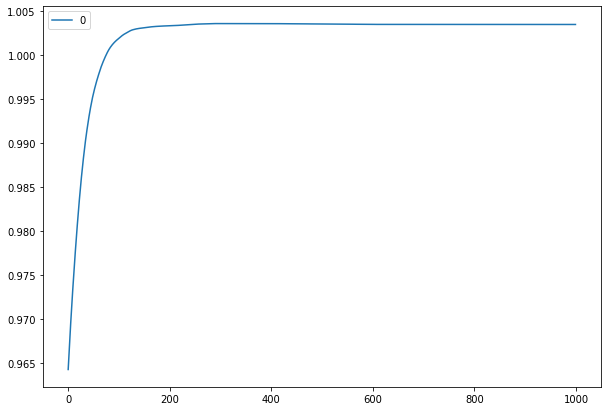

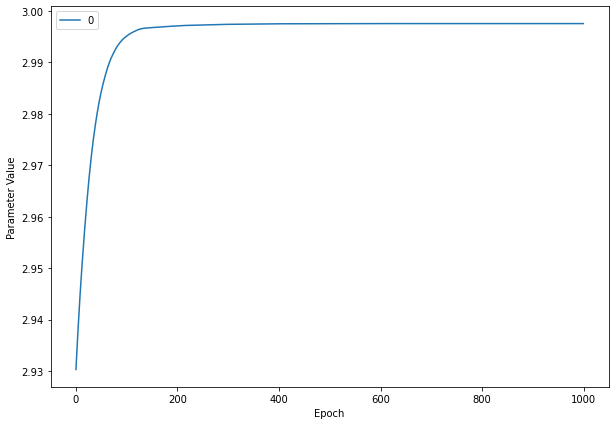

In [ ]:
# ------------------------------------------------------------
# Listing 3-5. Plot the parameter training histories.
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define DataFrame of parameter histories.
params = pd.DataFrame(alphaHist)
paramsBeta = pd.DataFrame(betaHist)
# Generate plot.
params.plot(figsize=(10,7))
paramsBeta.plot(figsize=(10,7))

# Set x axis label.
plt.xlabel('Epoch')

# Set y axis label.
plt.ylabel('Parameter Value')


In [ ]:
alphaHist.shape

AttributeError: ignored

In [ ]:
len(alphaHist)

1000

In [ ]:
len(betaHist)

1000